In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import pandas as pd
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fc63dced-84ba-4f06-8ae8-062ea48c2bab',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-09-11T05:41:02.191Z', 'error_code': 0, 'error_message': None, 'elapsed': 805, 'credit_count': 1, 'notice': None, 'total_count': 9154}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10450, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [10]:
type(data)

dict

In [11]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [16]:
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.Timestamp("now")

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19482031.00000,19482031.00000,False,NaN,1,NaN,NaN,None,2023-09-11T05:39:00.000Z,25851.10945,8158267482.91126,41.88890,0.34132,0.04766,-0.39961,-12.03151,-14.67257,-0.77544,503632115610.23761,48.67140,542873298364.78003,None,2023-09-11T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-11 00:46:58.052744
1,1027,Ethereum,ETH,ethereum,7361,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221789.88140,120221789.88140,True,NaN,2,NaN,NaN,None,2023-09-11T05:39:00.000Z,1613.88638,4447119432.20777,81.38850,0.23639,-0.67263,-1.38014,-12.57668,-13.52808,-7.71447,194024309368.79791,18.75070,194024309368.79999,None,2023-09-11T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-11 00:46:58.052744
2,825,Tether USDt,USDT,tether,61857,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83016246102.32362,85437198727.24951,True,NaN,3,NaN,NaN,None,2023-09-11T05:39:00.000Z,0.99984,14848918732.78932,30.51050,0.01979,-0.00898,0.00469,0.05453,-0.01496,-0.00170,83002675418.59026,8.03510,85423232289.87000,None,2023-09-11T05:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-11 00:46:58.052744
3,1839,BNB,BNB,bnb,1617,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153849208.52828,153849208.52828,False,NaN,4,NaN,NaN,None,2023-09-11T05:39:00.000Z,211.91242,310962724.61254,18.72940,0.07576,-0.26722,-1.36364,-11.64409,-13.00293,-9.64767,32602558085.51864,3.15070,32602558085.52000,None,2023-09-11T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-11 00:46:58.052744
4,52,XRP,XRP,xrp,1065,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53083046512.00000,99988441546.00000,False,NaN,5,NaN,NaN,None,2023-09-11T05:39:00.000Z,0.49625,536200136.99999,34.30750,-0.02098,-0.61109,-2.65466,-21.17227,5.00612,-6.31872,26342557812.25928,2.55010,49625180812.30000,None,2023-09-11T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-11 00:46:58.052744
5,3408,USD Coin,USDC,usd-coin,14016,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26175831371.52586,26175831371.52586,False,NaN,6,NaN,NaN,None,2023-09-11T05:39:00.000Z,1.00035,2110096834.02876,53.03920,0.03505,0.01200,0.03221,0.02533,0.03029,0.04064,26184890222.01476,2.53510,26184890222.01000,None,2023-09-11T05:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-11 00:46:58.052744
6,2010,Cardano,ADA,cardano,931,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35092914190.67700,36152657252.52400,False,NaN,7,NaN,NaN,None,2023-09-11T05:39:00.000Z,0.24774,104376633.79182,12.35800,0.06233,0.13504,-3.58186,-15.43845,-13.71123,-11.10423,8693841206.01575,0.84160,11148200806.15000,None,2023-09-11T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-11 00:46:58.052744
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140958456383.70517,140958456383.70517,True,NaN,8,NaN,NaN,None,2023-09-11T05:39:00.000Z,0.06128,196377631.31282,19.71320,0.13998,-0.67348,-3.10902,-19.27981,-5.32968,-0.98208,8638622142.89357,0.83630,8638622142.89000,None,2023-09-11T05:39:

In [ ]:
def apiCall():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fc63dced-84ba-4f06-8ae8-062ea48c2bab',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data["data"])
    df["timestamp"] = pd.Timestamp("now")
    df
    
    if not os.path.isfile(r"D:\Code\Crypto\data.csv"):
        df.to_csv(r"D:\Code\Crypto\data.csv", header = "column_names")
    else:
        df.to_csv(r"D:\Code\Crypto\data.csv", mode = "a", header = False)

In [ ]:
for i in range(20):
    apiCall()
    print("API call has been completed.")
    sleep(60) #Sleep for 1 minute
exit()

In [ ]:
dfcsv = pd.read_csv("D:\Code\Crypto\data.csv")
dfcsv

In [15]:
df3 = df.groupby("name", sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.34132,0.04766,-0.39961,-12.03151,-14.67257,-0.77544
Ethereum,0.23639,-0.67263,-1.38014,-12.57668,-13.52808,-7.71447
Tether USDt,0.01979,-0.00898,0.00469,0.05453,-0.01496,-0.00170
BNB,0.07576,-0.26722,-1.36364,-11.64409,-13.00293,-9.64767
XRP,-0.02098,-0.61109,-2.65466,-21.17227,5.00612,-6.31872
USD Coin,0.03505,0.01200,0.03221,0.02533,0.03029,0.04064
Cardano,0.06233,0.13504,-3.58186,-15.43845,-13.71123,-11.10423
Dogecoin,0.13998,-0.67348,-3.10902,-19.27981,-5.32968,-0.98208
Solana,-0.26567,-0.57589,-7.71909,-25.50288,-15.75050,18.66872


In [20]:
dataSeries = df3.stack()

dataSeries

name                                     
Bitcoin      quote.USD.percent_change_1h      0.34132
             quote.USD.percent_change_24h     0.04766
             quote.USD.percent_change_7d     -0.39961
             quote.USD.percent_change_30d   -12.03151
             quote.USD.percent_change_60d   -14.67257
             quote.USD.percent_change_90d    -0.77544
Ethereum     quote.USD.percent_change_1h      0.23639
             quote.USD.percent_change_24h    -0.67263
             quote.USD.percent_change_7d     -1.38014
             quote.USD.percent_change_30d   -12.57668
             quote.USD.percent_change_60d   -13.52808
             quote.USD.percent_change_90d    -7.71447
Tether USDt  quote.USD.percent_change_1h      0.01979
             quote.USD.percent_change_24h    -0.00898
             quote.USD.percent_change_7d      0.00469
             quote.USD.percent_change_30d     0.05453
             quote.USD.percent_change_60d    -0.01496
             quote.USD.percent_change_90

In [21]:
type(dataSeries)

pandas.core.series.Series

In [25]:
df4 = dataSeries.to_frame(name = "values")

df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.34132
            quote.USD.percent_change_24h   0.04766
            quote.USD.percent_change_7d   -0.39961
            quote.USD.percent_change_30d -12.03151
            quote.USD.percent_change_60d -14.67257
            quote.USD.percent_change_90d  -0.77544
Ethereum    quote.USD.percent_change_1h    0.23639
            quote.USD.percent_change_24h  -0.67263
            quote.USD.percent_change_7d   -1.38014
            quote.USD.percent_change_30d -12.57668
            quote.USD.percent_change_60d -13.52808
            quote.USD.percent_change_90d  -7.71447
Tether USDt quote.USD.percent_change_1h    0.01979
            quote.USD.percent_change_24h  -0.00898
            quote.USD.percent_change_7d    0.00469
            quote.USD.percent_change_30d   0.05453
            quote.USD.percent_change_60d  -0.01496
            quote.USD.percent_change_90d  -0.00170
BNB         quote.USD.percent_change_1h    0.07576
            quote.USD.percent_change_24h  -0.26722
            quote.USD.percent_change_7d   -1.36364
            quote.USD.percent_change_30d -11.64409
            quote.USD.percent_change_60d -13.00293
            quote.USD.percent_change_90d  -9.64767
XRP         quote.USD.percent_change_1h   -0.02098
            quote.USD.percent_change_24h  -0.61109
            quote.USD.percent_change_7d   -2.65466
            quote.USD.percent_change_30d -21.17227
            quote.USD.percent_change_60d   5.00612
            quote.USD.percent_change_90d  -6.31872
USD Coin    quote.USD.percent_change_1h    0.03505
            quote.USD.percent_change_24h   0.01200
            quote.USD.percent_change_7d    0.03221
            quote.USD.percent_change_30d   0.02533
            quote.USD.percent_change_60d   0.03029
            quote.USD.percent_change_90d   0.04064
Cardano     quote.USD.percent_change_1h    0.06233
            quote.USD.percent_change_24h   0.13504
            quote.USD.percent_change_7d   -3.58186
            quote.USD.percent_change_30d -15.43845
            quote.USD.percent_change_60d -13.71123
            quote.USD.percent_change_90d -11.10423
Dogecoin    quote.USD.percent_change_1h    0.13998
            quote.USD.percent_change_24h  -0.67348
            quote.USD.percent_change_7d   -3.10902
            quote.USD.percent_change_30d -19.27981
            quote.USD.percent_change_60d  -5.32968
            quote.USD.percent_change_90d  -0.98208
Solana      quote.USD.percent_change_1h   -0.26567
            quote.USD.percent_change_24h  -0.57589
            quote.USD.percent_change_7d   -7.71909
            quote.USD.percent_change_30d -25.50288
            quote.USD.percent_change_60d -15.75050
            quote.USD.percent_change_90d  18.66872
TRON        quote.USD.percent_change_1h    0.26052
            quote.USD.percent_change_24h   0.30655
            quote.USD.percent_change_7d    2.10052
            quote.USD.percent_change_30d   1.82190
            quote.USD.percent_change_60d   1.08628
            quote.USD.percent_change_90d   8.73494
Toncoin     quote.USD.percent_change_1h    0.19001
            quote.USD.percent_change_24h  -2.49290
            quote.USD.percent_change_7d  -10.96841
            quote.USD.percent_change_30d  32.05314
            quote.USD.percent_change_60d  29.85994
            quote.USD.percent_change_90d  13.05157
Dai         quote.USD.percent_change_1h    0.05164
            quote.USD.percent_change_24h   0.05220
            quote.USD.percent_change_7d    0.09885
            quote.USD.percent_change_30d   0.06988
            quote.USD.percent_change_60d   0.08737
            quote.USD.percent_change_90d   0.04805
Polkadot    quote.USD.percent_change_1h   -0.18655
            quote.USD.percent_change_24h  -1.17661
            quote.USD.percent_change_7d   -3.67316
            quote.USD.percent_change_30d -17.73935
            quote.USD.percent_change_60d -20.01078
            quo

In [30]:
type(df4)

pandas.core.frame.DataFrame

In [31]:
df4.count()

values    90
dtype: int64

In [32]:
index = pd.Index(range(90))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.34132
1,Bitcoin,quote.USD.percent_change_24h,0.04766
2,Bitcoin,quote.USD.percent_change_7d,-0.39961
3,Bitcoin,quote.USD.percent_change_30d,-12.03151
4,Bitcoin,quote.USD.percent_change_60d,-14.67257
5,Bitcoin,quote.USD.percent_change_90d,-0.77544
6,Ethereum,quote.USD.percent_change_1h,0.23639
7,Ethereum,quote.USD.percent_change_24h,-0.67263
8,Ethereum,quote.USD.percent_change_7d,-1.38014
9,Ethereum,quote.USD.percent_change_30d,-12.57668


In [42]:
df6 = df5.rename(columns = {"level_1": "percent_change"})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.34132
1,Bitcoin,quote.USD.percent_change_24h,0.04766
2,Bitcoin,quote.USD.percent_change_7d,-0.39961
3,Bitcoin,quote.USD.percent_change_30d,-12.03151
4,Bitcoin,quote.USD.percent_change_60d,-14.67257
5,Bitcoin,quote.USD.percent_change_90d,-0.77544
6,Ethereum,quote.USD.percent_change_1h,0.23639
7,Ethereum,quote.USD.percent_change_24h,-0.67263
8,Ethereum,quote.USD.percent_change_7d,-1.38014
9,Ethereum,quote.USD.percent_change_30d,-12.57668


In [44]:
df6["percent_change"] = df6["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1hr", "24h", "7d", "30d", "60d", "90d"])
df6

,name,percent_change,values
0,Bitcoin,1hr,0.34132
1,Bitcoin,24h,0.04766
2,Bitcoin,7d,-0.39961
3,Bitcoin,30d,-12.03151
4,Bitcoin,60d,-14.67257
5,Bitcoin,90d,-0.77544
6,Ethereum,1hr,0.23639
7,Ethereum,24h,-0.67263
8,Ethereum,7d,-1.38014
9,Ethereum,30d,-12.57668


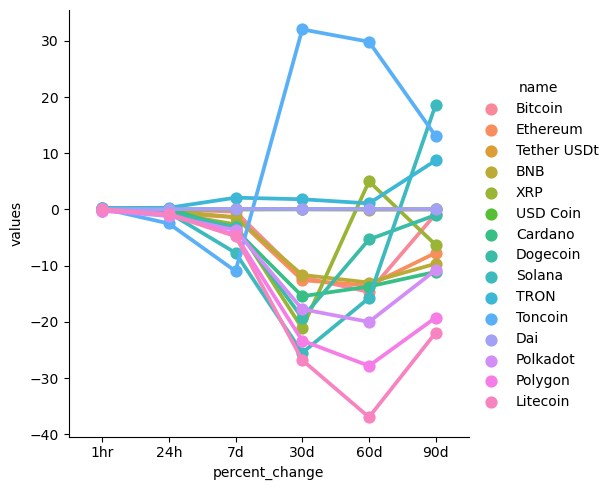

In [45]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df6, kind = "point")

In [50]:
df10 = df[["name", "quote.USD.price", "timestamp"]]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,25851.10945,2023-09-11 00:46:58.052744


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

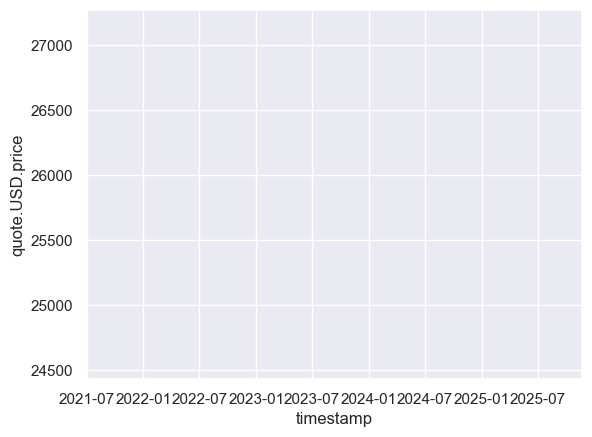

In [55]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = "timestamp", y = "quote.USD.price", data = df10)